In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()

In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
df.shape

(442, 11)

In [7]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'],axis=1)
y = df[['target']]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2)
x_train.shape,x_test.shape

((331, 10), (111, 10))

In [33]:
from sklearn.linear_model import Ridge
def ridge_regression(alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train,y_train)
    # np.insert(result,0,ridge.intercept_)
    return ridge.coef_.tolist()
ridge_regression(10)

[[20.363987256343673,
  3.0162329978315463,
  60.69336570449727,
  47.397391493803575,
  19.47105341343707,
  14.547019074527327,
  -38.42449378944027,
  39.48822783462921,
  59.68515414450241,
  36.68125819829539]]

In [34]:
data.feature_names,ridge_regression(10)

(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
 [[20.363987256343673,
   3.0162329978315463,
   60.69336570449727,
   47.397391493803575,
   19.47105341343707,
   14.547019074527327,
   -38.42449378944027,
   39.48822783462921,
   59.68515414450241,
   36.68125819829539]])

Text(0.5, 1.0, 'Alpha=150')

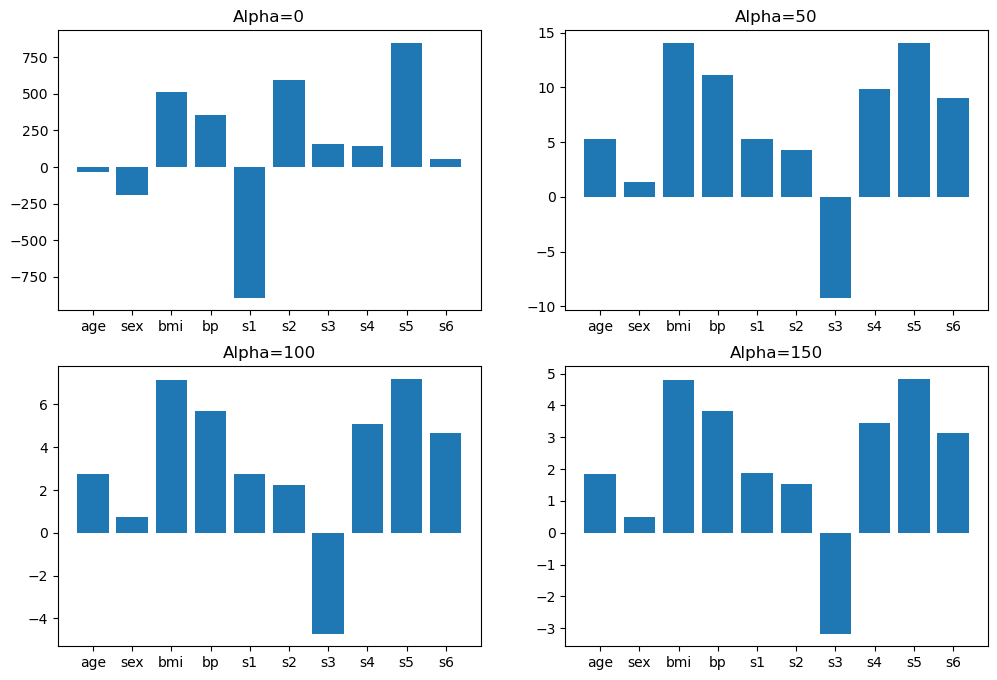

In [44]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.bar(x=data.feature_names,height=ridge_regression(0)[0])
plt.title("Alpha={}".format(0))
plt.subplot(2,2,2)
plt.bar(x=data.feature_names,height=ridge_regression(50)[0])
plt.title("Alpha={}".format(50))
plt.subplot(2,2,3)
plt.bar(x=data.feature_names,height=ridge_regression(100)[0])
plt.title("Alpha={}".format(100))
plt.subplot(2,2,4)
plt.bar(x=data.feature_names,height=ridge_regression(150)[0])
plt.title("Alpha={}".format(150))

### Higher Coef's are impacted more?

In [61]:

alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs=[]
for i in alphas:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train,y_train)
    coefs.append(np.insert(ridge.coef_[0],0,i))
coefs = pd.DataFrame(coefs,columns=np.concatenate([['alpha'],data.feature_names]))
coefs  
# as the alpha is increses the coef are keep on decreasing

,alpha,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.0000,-36.490348,-194.098116,513.885933,355.029711,-891.003703,591.687949,155.494178,146.446684,846.852025,54.302198
1,0.0001,-36.438474,-193.977305,514.079732,354.980745,-878.245348,581.591657,149.836852,144.862871,841.968312,54.356092
2,0.0005,-36.238166,-193.519639,514.787435,354.789902,-830.690141,543.948889,128.774468,139.003373,823.736418,54.565206
3,0.0010,-36.001931,-192.997709,515.539531,354.561198,-778.073463,502.279302,105.521235,132.611114,803.504647,54.813855
4,0.0050,-34.448267,-189.992182,518.444882,352.961650,-517.175984,295.223753,-8.541895,103.117127,701.677405,56.497363
5,0.1000,-13.700200,-160.038304,478.484010,324.732080,-58.814174,-57.321349,-180.167182,96.883875,466.161476,78.934299
6,0.5000,24.428599,-86.825511,352.264976,248.271695,5.499040,-35.633829,-164.028993,114.847038,324.693155,106.237755
7,1.0000,37.839071,-46.689083,271.709105,196.725293,22.967754,-8.132449,-139.674110,110.497852,251.142342,105.225169
8,5.0000,30.972544,0.457132,104.883431,80.665968,27.963441,18.675532,-64.015615,62.749438,101.441657,58.904129
9,10.0000,20.363987,3.016233,60.693366,47.397391,19.471053,14.547019,-38.424494,39.488228,59.685154,36.681258


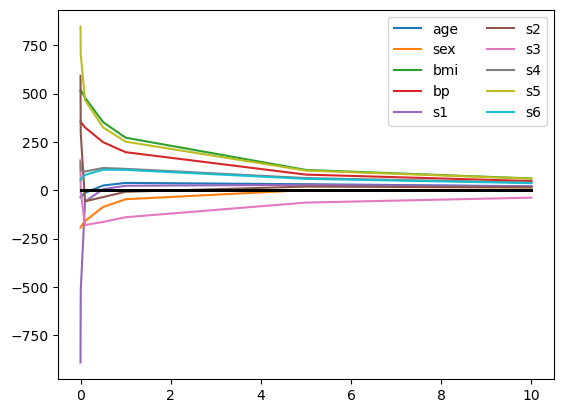

In [69]:

plt.plot(alphas,coefs['age'],label='age')
plt.plot(alphas,coefs['sex'],label='sex')
plt.plot(alphas,coefs['bmi'],label='bmi')
plt.plot(alphas,coefs['bp'],label='bp')
plt.plot(alphas,coefs['s1'],label='s1')
plt.plot(alphas,coefs['s2'],label='s2')
plt.plot(alphas,coefs['s3'],label='s3')
plt.plot(alphas,coefs['s4'],label='s4')
plt.plot(alphas,coefs['s5'],label='s5')
plt.plot(alphas,coefs['s6'],label='s6')
plt.plot(alphas,np.zeros(coefs.shape),lw=2,color='black')
plt.legend(ncols=2)

### Impact on bias and variance

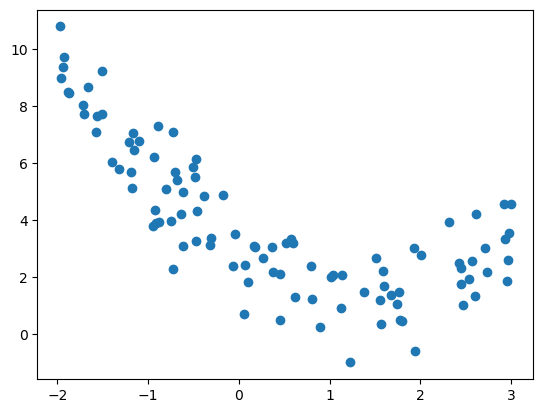

In [87]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

### Impact on bias and variance

In [88]:
from mlxtend.evaluate import bias_variance_decomp
loss = []
bias = []
variance= []
alphas = np.linspace(0,30,100)
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # ridge.fit(x_train,y_train)
    avg_loss,avg_bias,avg_var = bias_variance_decomp(
        ridge,x_train.values,y_train.values.ravel(),x_test.values,y_test.values.ravel(),
        loss = 'mse',
        random_seed = 123
    )
    loss.append(avg_loss)
    bias.append(avg_bias)
    variance.append(avg_var)


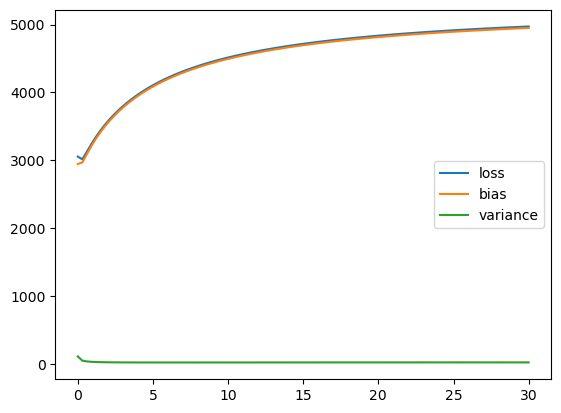

In [89]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.legend()

### effect on loss function

[27.82809103]
-2.29474455867698


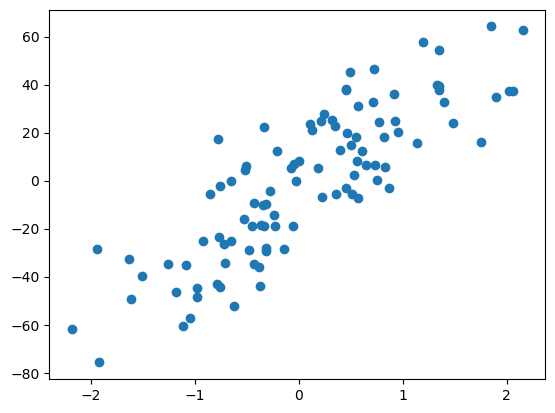

In [91]:
from sklearn.datasets import make_regression

x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(x,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x,y)
print(reg.coef_)
print(reg.intercept_)

In [92]:
def precict(m):
    return m*-2.29

In [96]:
def calc_loss(m,alpha):
    return np.sum((y-m*x.ravel()+2.29)**2)+alpha*m*m

Text(0, 0.5, 'loss')

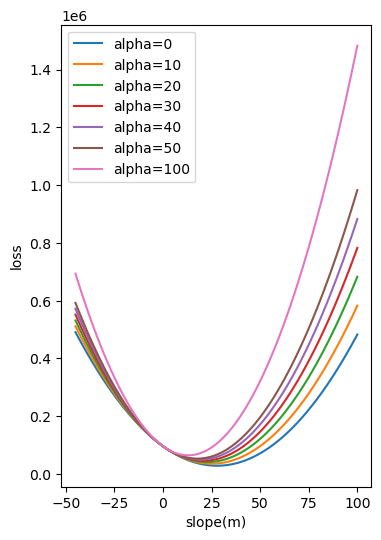

In [97]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for alpha in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = calc_loss(m[i],alpha)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha={}'.format(alpha))
plt.legend()
plt.xlabel('slope(m)')
plt.ylabel('loss')